# BUSSINESS UNDERSTANDING

model ini dibuat untuk mendapatkan prediksi harga BTC dalam USD yang dapatkan dengan inputan:

Harga dimana sekuritas finansial dibuka di pasar saat perdangangan dimulai

Harga terrtinggi dimana BTC di perdagangkan selama satu periode

Harga minimum BTC dalam satu periode


In [172]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
df = pd.read_csv('BTC-USD.csv')

# DATA UNDERSTANDING

Date - Tanggal

Open - Ini adalah harga di mana sekuritas finansial dibuka di pasar saat perdagangan dimulai.

High - Tinggi adalah harga tertinggi di mana saham diperdagangkan selama suatu periode.

Low - Rendah adalah harga minimum saham dalam satu periode.

Close - Harga penutupan umumnya mengacu pada harga terakhir di mana saham diperdagangkan selama sesi perdagangan reguler.

Adj Close - Harga penutupan yang disesuaikan mengubah harga penutupan saham untuk mencerminkan nilai saham itu setelah memperhitungkan setiap

Volume - Volume mengukur jumlah saham yang diperdagangkan dalam saham atau kontrak yang diperdagangkan di masa depan atau opsi.

In [174]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2788 non-null   object 
 1   Open       2788 non-null   float64
 2   High       2788 non-null   float64
 3   Low        2788 non-null   float64
 4   Close      2788 non-null   float64
 5   Adj Close  2788 non-null   float64
 6   Volume     2788 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.6+ KB


<Axes: >

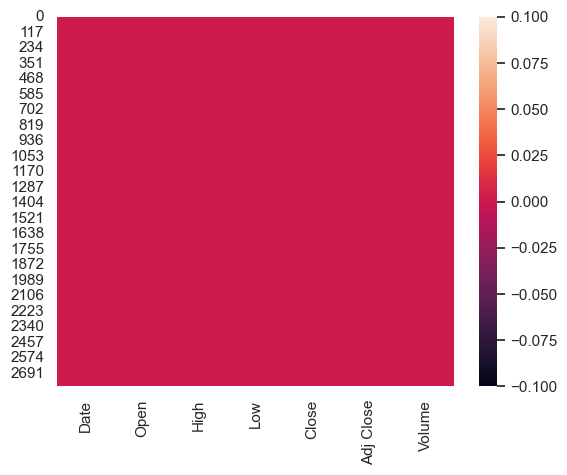

In [176]:
sns.heatmap(df.isnull())

In [177]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381435,16615.381435,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040039,11388.611572,10722.320557,11056.325195,11056.325195,2.558002e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# DATA PREPARATION

C:\Users\lizap\AppData\Local\Temp\ipykernel_20620\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

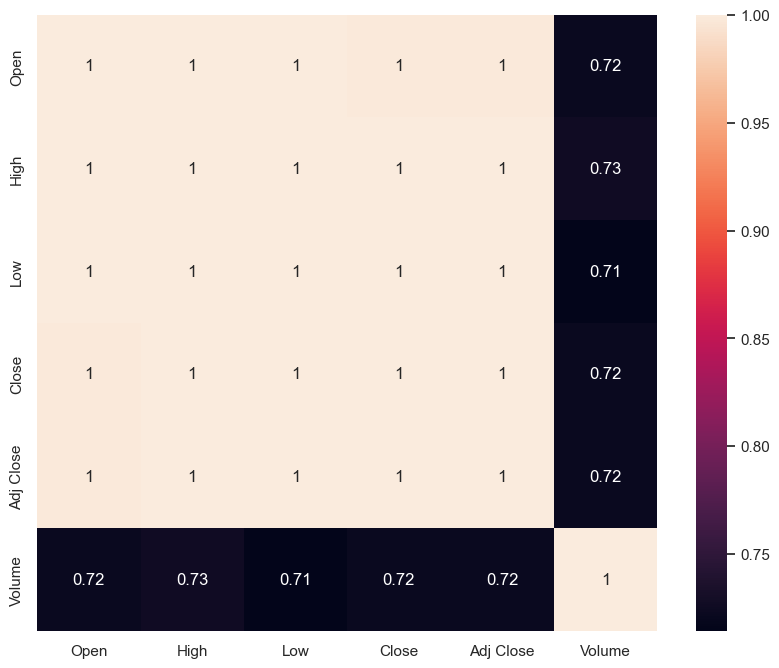

In [178]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

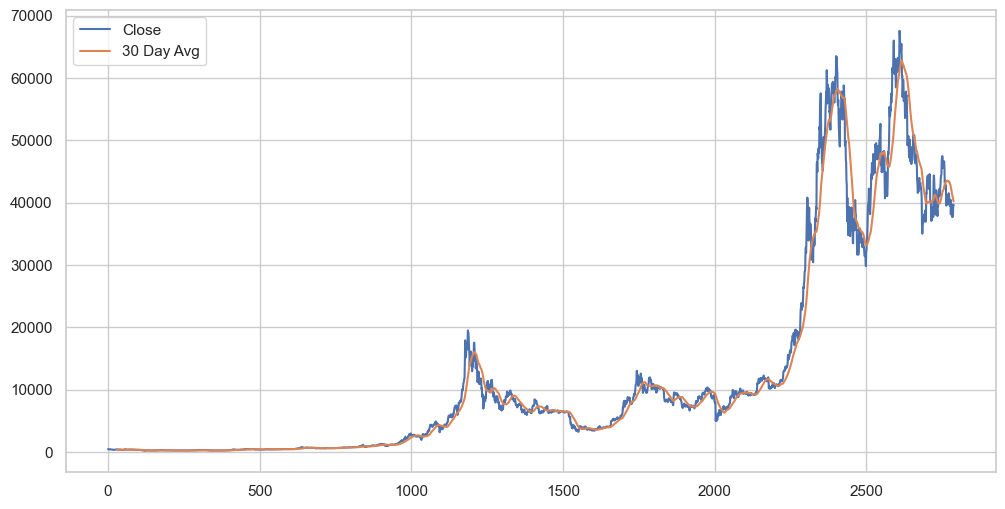

In [179]:
sns.set()
sns.set_style('whitegrid')
# Plotting the 
#rolling 30 day average against the Close Price
df['Close'].plot(figsize=(12,6),label='Close')
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [180]:
df = df.drop(['Adj Close','Volume'], axis=1)

# seleksi fitur

In [181]:
features = ['Open', 'High', 'Low']
x = df[features]
y = df['Close']
x.shape, y.shape

((2788, 3), (2788,))

# split data training dan data testing

In [182]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(697,)

# membuat model regresi linier

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [184]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.9996413273935153


# membuat inputan model regresi linier

In [185]:
#Open  ,  High ,    Low    , Close
#465.86, 468.17, 452.421997, 457.334015
input_data = np.array([[465.86,468.17,452.42]]) # type: ignore

prediction = lr.predict(input_data)
print('Estimasi harga BTC :', prediction)

Estimasi harga BTC : [460.11268881]


c:\Users\lizap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [186]:
import pickle

filename = 'estimasi_BTC.sav'
pickle.dump(lr,open(filename,'wb'))